In [1]:
# grep -i "gw01.extranet.frachtwerk.de filterlog" pfsense.log > pfsense.csv
import pandas
import matplotlib.pyplot as plt
import pyarrow.parquet as pq

In [2]:
# Full parquet needs to be build
# df = pd.read_parquet('./data/df_v4.parquet', engine='pyarrow') 
df = pandas.read_parquet('./data/df_v4_10000', engine='pyarrow') 

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (17,20,21,24,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
test_df = df.head(100)

0     23.54.112.189
1     23.54.112.189
2     23.54.112.189
3     23.54.112.189
4     23.54.112.189
          ...      
95     5.182.200.14
96     5.182.200.13
97     5.182.200.13
98     5.182.200.13
99     5.182.200.11
Name: 19, Length: 100, dtype: object

In [17]:
# Show ip addresses source statistics
df['source_ip'].describe()

count          15320937
unique           309241
top       54.39.130.200
freq             513038
Name: 18, dtype: object

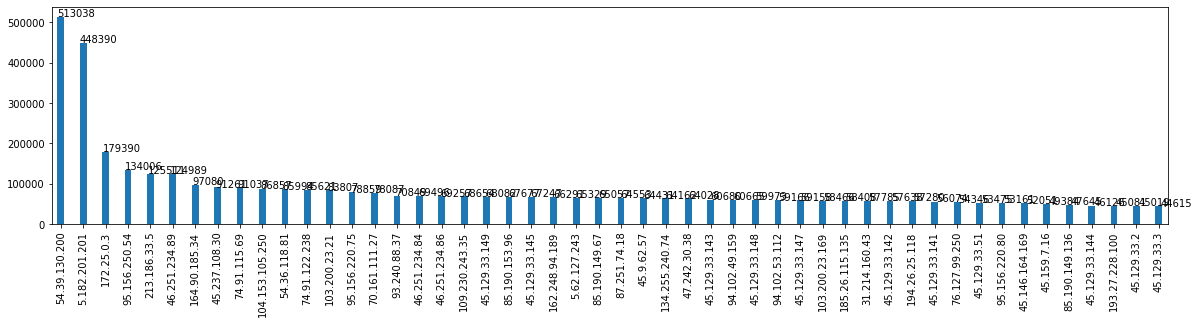

In [13]:
# Plot ip addresses source ip count top 50
ax = df['source_ip'].value_counts()[:50].plot(kind='bar',figsize=(20,4), width=0.3)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Source IP addresses with most access (top 7)
Analytics provided by https://www.shodan.io
- 54.39.130.200 : Canada : ns572703.ip-54-39-130.net: Google Tag Manager
- 5.182.201.201 : Germany : hosting.frachtwerk.de
- 172.25.0.3 : Internal IP
- 95.156.250.54 : ???
- 213.186.33.55 : ???
- 46.251.234.89 : ???
- 164.90.185.34 : Germany : Digital Ocean

In [18]:
# Show ip addresses destination statistics
df['destination_ip'].describe()

count          15320937
unique           309241
top       54.39.130.200
freq             513038
Name: 18, dtype: object

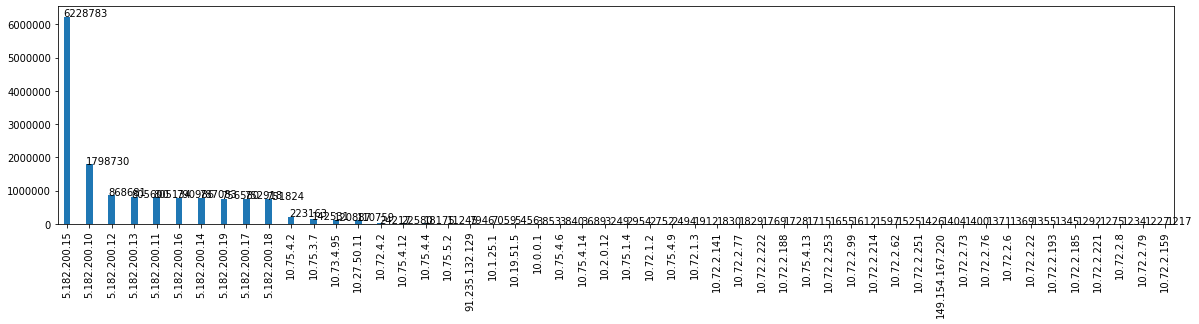

In [22]:
# Plot ip addresses destination ip top 50
ax = df['destination_ip'].value_counts()[:50].plot(kind='bar',figsize=(20,4), width=0.3)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Destination IP addresses with most access (top 7)
Analytics provided by https://www.shodan.io
- 5.182.200.15 : ??? Internal
- 5.182.200.10 : ??? Internal
- 5.182.200.12 : ??? Internal
- 5.182.200.13 : ??? Internal
- 5.182.200.11 : ??? Internal
- 5.182.200.16 : ??? Internal
- 5.182.200.14 : ??? Internal

Interesting IP addresses:
- 91.235.132.129 : ThreatMetrix: Netherlands : aa.online-metrix.net
- 149.154.167.220 : ???